# LOAD LIBRARY

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time

# LOAD DATA

In [2]:
df_ori = pd.read_csv("data/training.csv")
df_ori.head()

,MEREK,HARGA,KENDARAAN,ODOMETER,TRANSMISI,JENIS_KENDARAAN,TAHUN_BUAT,NEGARA
0,FORD,85000000,MOBIL,102500.0,MATIC,MINIBUS,2013,AMERIKA
1,FORD,85000000,MOBIL,102500.0,MATIC,MINIBUS,2013,AMERIKA
2,FORD,85000000,MOBIL,102500.0,MATIC,MINIBUS,2013,AMERIKA
3,FORD,85000000,MOBIL,102500.0,MATIC,MINIBUS,2013,AMERIKA
4,FORD,85000000,MOBIL,102500.0,MATIC,MINIBUS,2013,AMERIKA


In [12]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89458 entries, 0 to 89457
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MEREK            89458 non-null  object 
 1   HARGA            89458 non-null  int64  
 2   KENDARAAN        89458 non-null  object 
 3   ODOMETER         89452 non-null  float64
 4   TRANSMISI        74298 non-null  object 
 5   JENIS_KENDARAAN  88935 non-null  object 
 6   TAHUN_BUAT       89458 non-null  int64  
 7   NEGARA           89458 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.5+ MB


Text(0, 0.5, 'Price (IDR)')

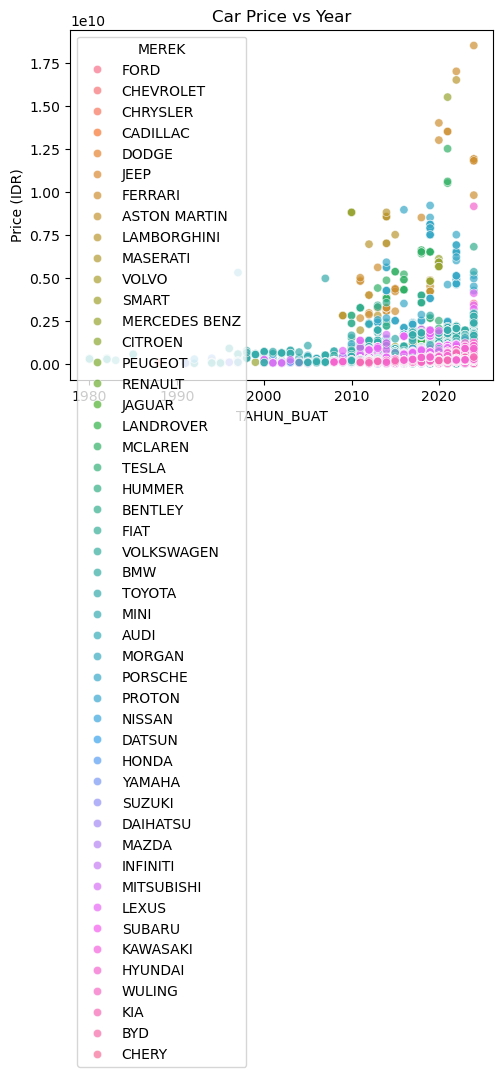

In [9]:
# Visualize relationships
plt.figure(figsize=(12, 10))

# Plot 1: Price vs Year with brands colored
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_ori, x='TAHUN_BUAT', y='HARGA', hue='MEREK', alpha=0.7)
plt.title('Car Price vs Year')
plt.ylabel('Price (IDR)')

# DATA PREPROCESSING

In [32]:
df = df_ori.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73777 entries, 0 to 89457
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MEREK            73777 non-null  object 
 1   HARGA            73777 non-null  int64  
 2   KENDARAAN        73777 non-null  object 
 3   ODOMETER         73777 non-null  float64
 4   TRANSMISI        73777 non-null  object 
 5   JENIS_KENDARAAN  73777 non-null  object 
 6   TAHUN_BUAT       73777 non-null  int64  
 7   NEGARA           73777 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.1+ MB


In [33]:
# Prepare data for modeling
X = df[['KENDARAAN', 'JENIS_KENDARAAN', 'MEREK', 'TRANSMISI', 'NEGARA', 'TAHUN_BUAT', 'ODOMETER', ]]
y = df['HARGA']

## Split the data

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['KENDARAAN', 'JENIS_KENDARAAN', 'MEREK', 'TRANSMISI', 'NEGARA']),
        ('num', StandardScaler(), ['TAHUN_BUAT', 'ODOMETER'])
    ])

# ML MODEL 

In [35]:
# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=100, epsilon=0.1)
}

# Results dictionary
results = {
    'Model': [],
    'Training Time (s)': [],
    'MSE': [],
    'MAE': [],
    'R²': []
}

## Train and Evaluate Model

In [36]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Measure training time
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results['Model'].append(name)
    results['Training Time (s)'].append(training_time)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R²'].append(r2)
    
    print(f"{name} - Training Time: {training_time:.2f}s, MSE: {mse:,.0f}, MAE: {mae:,.0f}, R²: {r2:.4f}")


Training Linear Regression...
Linear Regression - Training Time: 0.83s, MSE: 83,298,482,152,203,376, MAE: 146,833,133, R²: 0.5054

Training Random Forest...
Random Forest - Training Time: 49.43s, MSE: 33,430,094,349,174,452, MAE: 80,089,694, R²: 0.8015

Training Gradient Boosting...
Gradient Boosting - Training Time: 2.50s, MSE: 55,250,618,356,637,120, MAE: 126,861,520, R²: 0.6720

Training SVR...
SVR - Training Time: 171.32s, MSE: 179,396,210,831,937,120, MAE: 169,291,049, R²: -0.0651


In [40]:
X_test

,KENDARAAN,JENIS_KENDARAAN,MEREK,TRANSMISI,NEGARA,TAHUN_BUAT,ODOMETER
71910,MOBIL,MINIBUS,MITSUBISHI,MATIC,JEPANG,2018,112500.0
12176,MOBIL,MINIBUS,TOYOTA,MATIC,JEPANG,2022,52500.0
16883,MOBIL,MINIBUS,TOYOTA,MANUAL,JEPANG,2016,35393.0
11644,MOBIL,MINIBUS,TOYOTA,MATIC,JEPANG,2021,57500.0
10955,MOBIL,MINIBUS,TOYOTA,MATIC,JEPANG,2023,62500.0
...,...,...,...,...,...,...,...
7723,MOBIL,MINIBUS,MINI,MATIC,INGGRIS,2024,0.0
9281,MOBIL,MINIBUS,TOYOTA,MATIC,JEPANG,2013,87500.0
54163,MOBIL,MINIBUS,SUZUKI,MATIC,JEPANG,2019,57500.0
79175,MOBIL,MINIBUS,TOYOTA,MATIC,JEPANG,2021,37500.0


## Results

In [37]:
# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
               Model  Training Time (s)           MSE           MAE        R²
0  Linear Regression           0.825522  8.329848e+16  1.468331e+08  0.505431
1      Random Forest          49.426261  3.343009e+16  8.008969e+07  0.801515
2  Gradient Boosting           2.502809  5.525062e+16  1.268615e+08  0.671960
3                SVR         171.316722  1.793962e+17  1.692910e+08 -0.065132


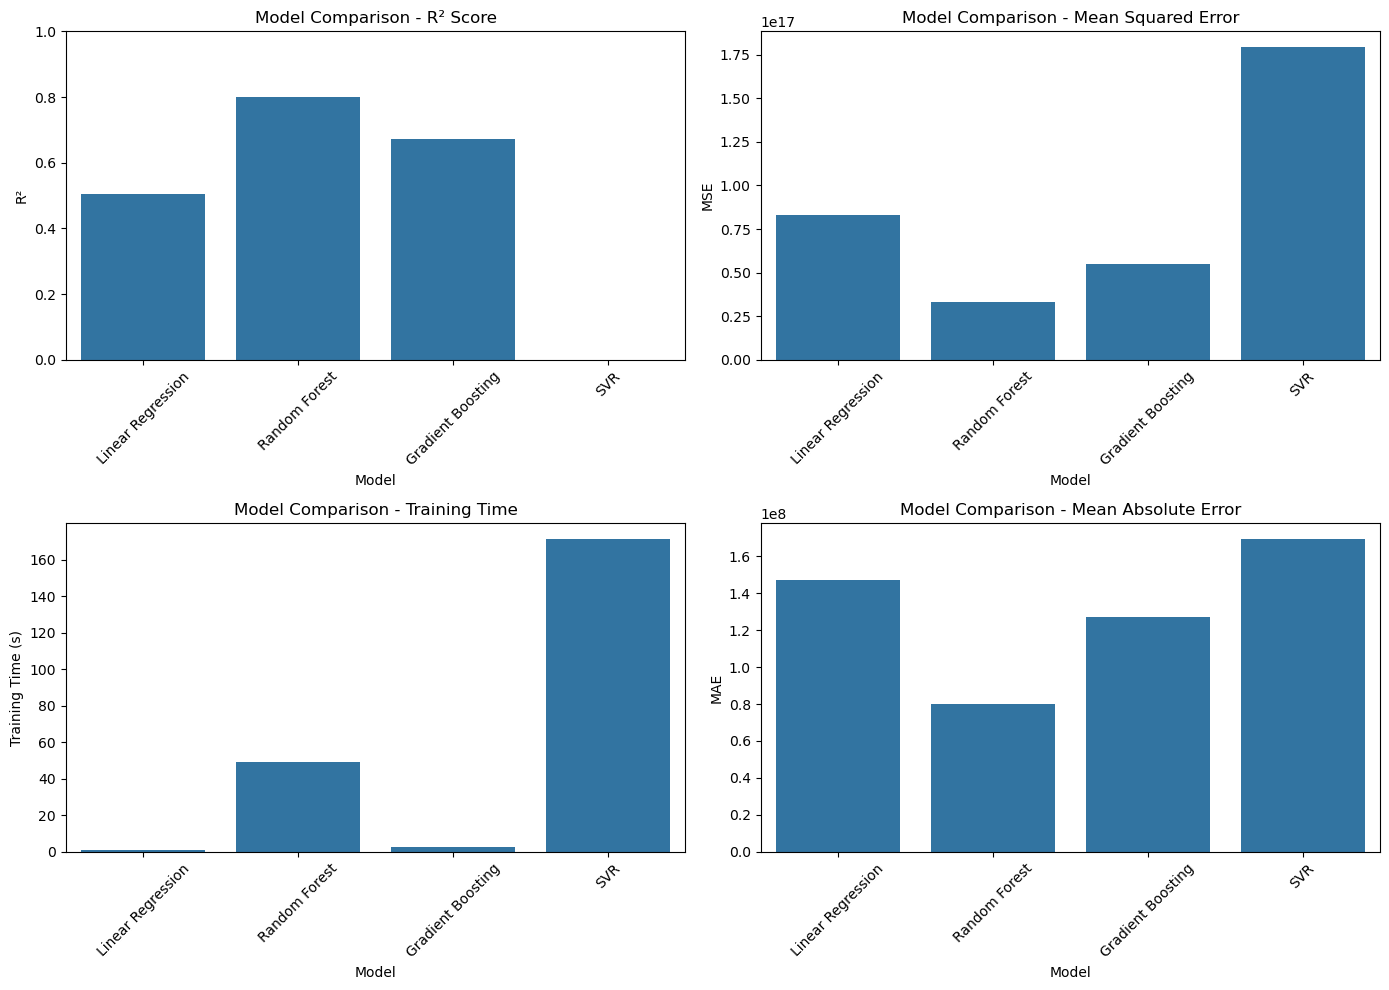

In [38]:
# Plot model performance comparison
plt.figure(figsize=(14, 10))

# Plot R² scores
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='R²', data=results_df)
plt.title('Model Comparison - R² Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Plot MSE
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Model Comparison - Mean Squared Error')
plt.xticks(rotation=45)

# Plot Training Time
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Training Time (s)', data=results_df)
plt.title('Model Comparison - Training Time')
plt.xticks(rotation=45)

# Plot MAE
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('Model Comparison - Mean Absolute Error')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [39]:
# Find the best performing model (based on R²)
best_model_name = results_df.loc[results_df['R²'].idxmax(), 'Model']
print(f"\nBest performing model: {best_model_name}")


Best performing model: Random Forest


## Tuning Hyperparameter

In [ ]:
if best_model_name == 'Random Forest':
    print("\nPerforming hyperparameter tuning for Random Forest...")
    
    # Define parameter grid
    param_grid = {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10]
    }
    
    # Create the pipeline
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
    
    # Grid search
    grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Best parameters and score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation R²: {grid_search.best_score_:.4f}")
    
    # Evaluate on test set
    best_rf = grid_search.best_estimator_
    y_pred_rf = best_rf.predict(X_test)
    rf_r2 = r2_score(y_test, y_pred_rf)
    rf_mse = mean_squared_error(y_test, y_pred_rf)
    
    print(f"Tuned Random Forest - Test MSE: {rf_mse:,.0f}, Test R²: {rf_r2:.4f}")
    
    # Feature importance for Random Forest
    if hasattr(best_rf['regressor'], 'feature_importances_'):
        # Get feature names after preprocessing
        cat_features = best_rf.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['brand', 'country'])
        num_features = ['year', 'odometer']
        all_features = np.concatenate([cat_features, num_features])
        
        # Get feature importances
        importances = best_rf['regressor'].feature_importances_
        
        # Create DataFrame and sort
        feature_importance = pd.DataFrame({
            'Feature': all_features,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title('Random Forest Feature Importance')
        plt.tight_layout()
        plt.show()
        
        print("\nFeature Importance:")
        print(feature_importance)

elif best_model_name == 'Gradient Boosting':
    print("\nPerforming hyperparameter tuning for Gradient Boosting...")
    
    # Define parameter grid
    param_grid = {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    }
    
    # Create the pipeline
    gb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ])
    
    # Grid search
    grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Best parameters and score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation R²: {grid_search.best_score_:.4f}")
    
    # Evaluate on test set
    best_gb = grid_search.best_estimator_
    y_pred_gb = best_gb.predict(X_test)
    gb_r2 = r2_score(y_test, y_pred_gb)
    gb_mse = mean_squared_error(y_test, y_pred_gb)
    
    print(f"Tuned Gradient Boosting - Test MSE: {gb_mse:,.0f}, Test R²: {gb_r2:.4f}")
    
    # Feature importance for GBM
    if hasattr(best_gb['regressor'], 'feature_importances_'):
        # Get feature names after preprocessing
        cat_features = best_gb.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['brand', 'country'])
        num_features = ['year', 'odometer']
        all_features = np.concatenate([cat_features, num_features])
        
        # Get feature importances
        importances = best_gb['regressor'].feature_importances_
        
        # Create DataFrame and sort
        feature_importance = pd.DataFrame({
            'Feature': all_features,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title('Gradient Boosting Feature Importance')
        plt.tight_layout()
        plt.show()
        
        print("\nFeature Importance:")
        print(feature_importance)

## Prediction

In [45]:
input_df = pd.DataFrame({
    'MEREK': ['JEEP'],
    'KENDARAAN': ['MOBIL'],
    'ODOMETER': [7500],
    'TRANSMISI': ['MATIC'],
    'JENIS_KENDARAAN': ['SEDAN'],
    'TAHUN_BUAT': [2024],
    'NEGARA': ['AMERIKA']
})

input_df

,MEREK,KENDARAAN,ODOMETER,TRANSMISI,JENIS_KENDARAAN,TAHUN_BUAT,NEGARA
0,JEEP,MOBIL,7500,MATIC,SEDAN,2024,AMERIKA


In [ ]:
# Create pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Measure training time
rf_pipeline.fit(X_train, y_train)

In [49]:
# Make predictions
round(float(rf_pipeline.predict(input_df)[0]), 2)

1064847737.72